<a href="https://colab.research.google.com/github/gcarmonav/Actividad_2-Optimizar-es-divertirse/blob/main/Optimizaci%C3%B3n_al_ojo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 02: Optimizar es divertirse
##Decisiones bajo incertidumbre

Por:

Giovanna Andrea Carmona Valencia cc. 39.193.395

Hilber Garcia López cc. 83.091.440


##1. Planteamiento

###1.1.Optimizando un modelo lineal a ojo

Considere el siguiente conjunto de datos:

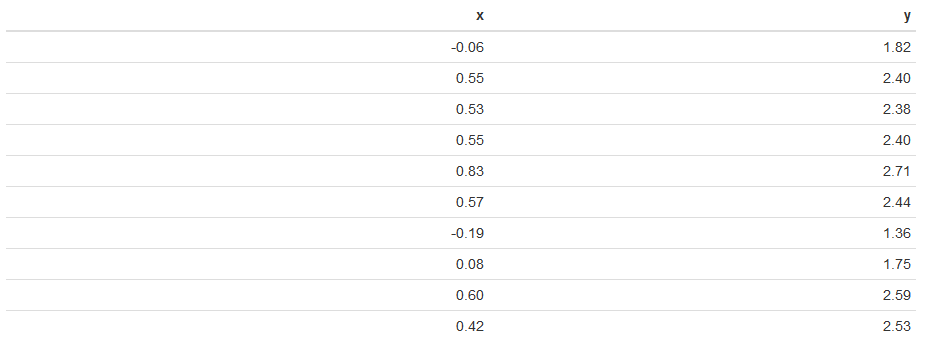

Los datos se ven así:



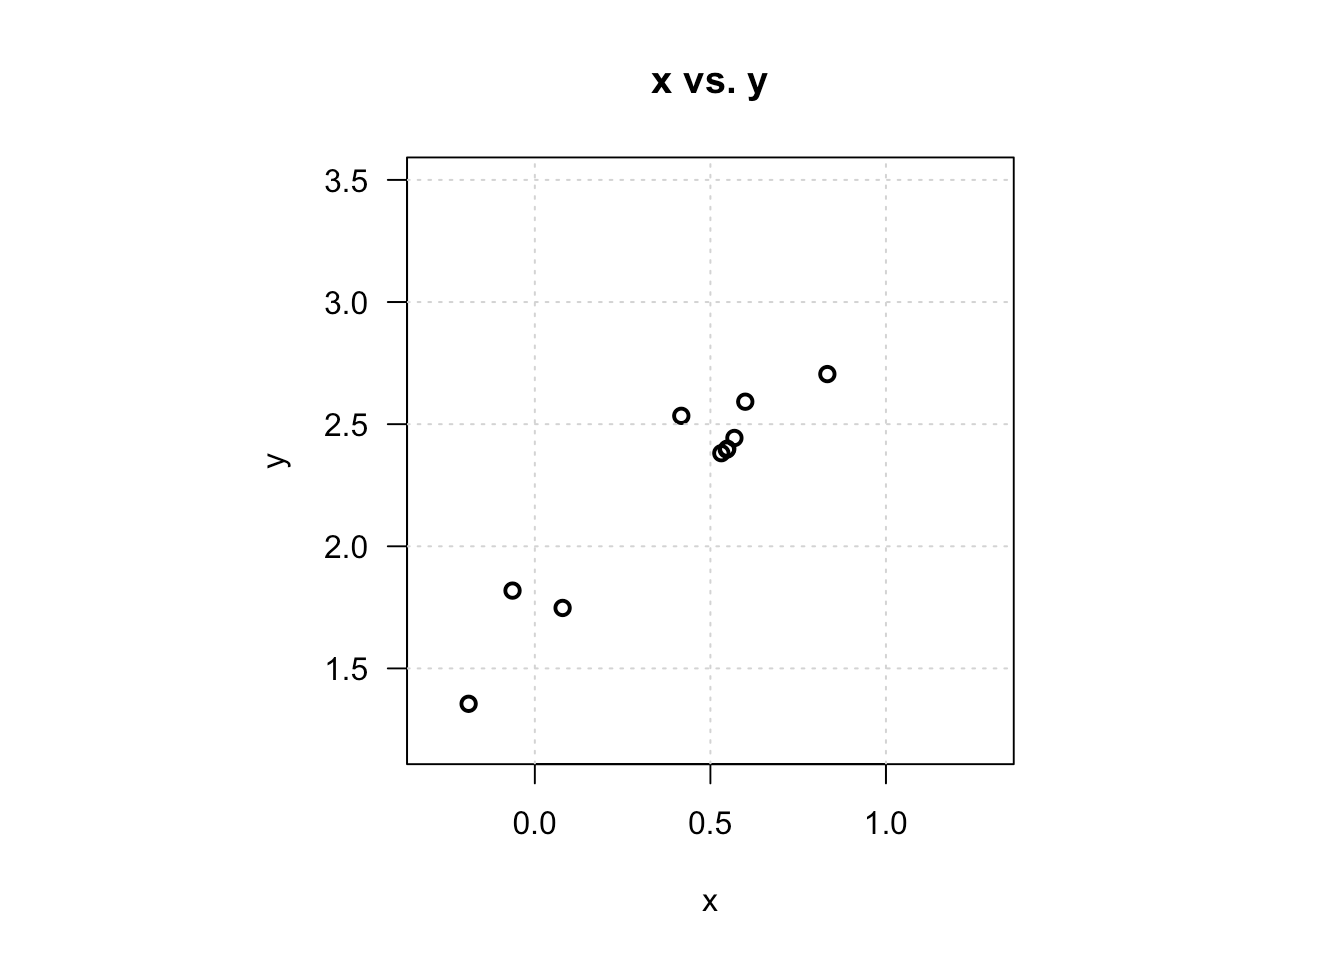

Objetivo: determinar a ojo cuáles son los valores del intercepto y de la pendiente de la recta que mejor aproxime los puntos.

Para cumplir el objetivo se puede escoger un punto en el espacio de parámetros y luego graficar la recta correspondiente, como se muestra a continuación:



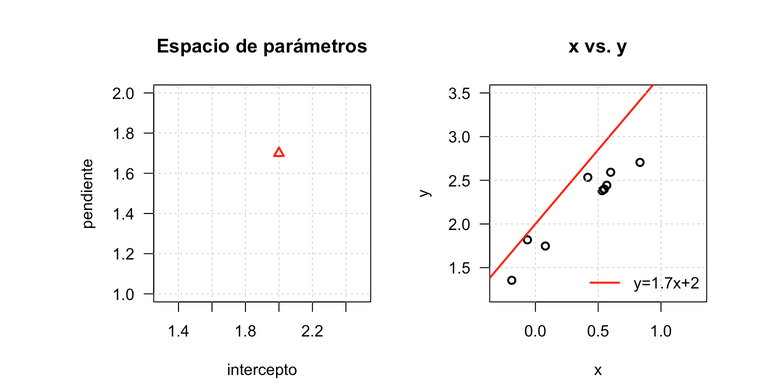

Con las funciones identify() y locator() es posible seleccionar un punto en el espacio de los parámetros (en la gráfica) y luego utilizar esos puntos para trazar la recta correspondiente con la función abline().

El procedimiento propuesto es el siguiente:

1. Proponga un punto en el espacio de parámetros
2. Grafique la recta sobre los puntos
3. Repita los dos pasos anteriores hasta que usted se sienta satisfecho con el resultado
4. Al finalizar genere un gif animado que muestre cómo evolucionó el ajuste (los paquetes caTools, animation y magick en R son opciones para hacer animaciones).


###1.2. Optimizando un modelo de regresión logística a ojo

A continuación se propone repetir el procedimiento anterior para unos datos datos_clasificacion.csv. El objetivo es ajustar una curva logística a los datos a ojo. A continuación se muestra un ejemplo de una curva logística:

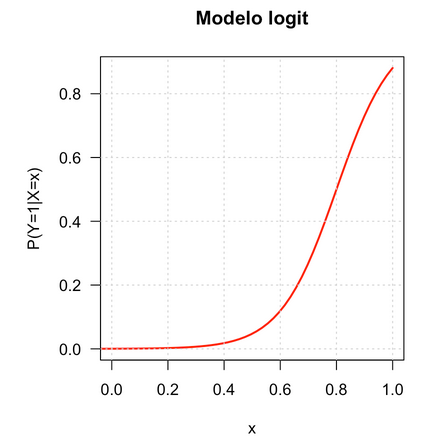

Recordemos que para la regresión logística (univariada) se tiene que

$Prob(Y=1|X=x)=1/(1+e−(β0+β1x))$

Un ejemplo de dos curvas logísticas se muestra a continuación:



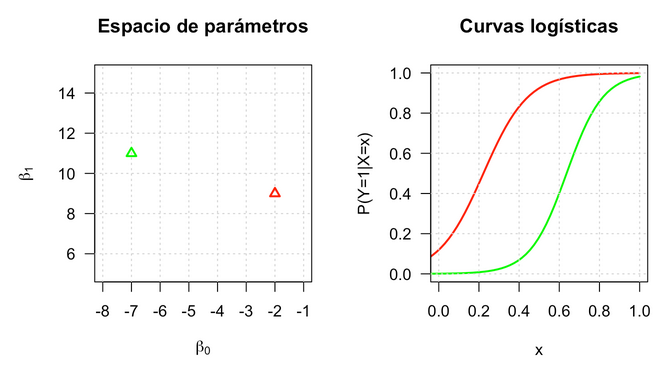

El procedimiento propuesto es el siguiente:

1. Divida el rango de la variable explicativa (es x) en 10 sub intervalos
2. En el centro de cada subintervalo dibuje una línea vertical cuya altura sea la tasa de ocurrencias (unos) en ese subintervarvalo 3.Proponga un punto en el espacio de parámetros
3. Grafique la curva logística sobre el gráfico anterior
4. Repita los dos pasos anteriores hasta que usted se sienta satisfecho con el resultado
5. Al finalizar genere un gif animado que muestre cómo evolucionó el ajuste .

##2. Solución

A continuación se desarrollará el modelo líneal pero utilizando la función linearRegressión de librería de sklearn en Python, la cual es equivalente a la función abline en R:

##2.1. Optimizando un modelo lineal a ojo

Se importan las librerías a utilizar:

In [14]:
import imageio
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

Se definen los puntos dados en el planteamiento:

In [2]:
x=[-0.06,0.55,0.53,0.55,0.83,0.57,-0.19,0.08,0.60,0.42]
y=[1.82,2.40,2.38,2.40,2.71,2.44,1.36,1.75,2.59,2.53]

Con np.empty se crea un array de tamaño 6 por 2, y se completan con los puntos seleccionados para el desarrollo de este trabajo:

In [3]:
p_x=np.empty([6,2])
p_y=np.empty([6,2])
p_x[0,:]=[-0.1901380, -0.0624039]
p_x[1,:]=[ 0.4180140, 0.7062903]
p_x[2,:]=[0.09130077, 0.42442010]
p_x[3,:]=[-0.04963433, 0.83441312]
p_x[4,:]=[-0.1713510, 0.6166043]
p_x[5,:]=[-0.1777572,  0.8408193]

p_y[0,:]=[1.346394, 1.807585]
p_y[1,:]=[2.531522, 2.630169]
p_y[2,:]=[1.742348, 2.515081]
p_y[3,:]=[1.824553, 2.712375]
p_y[4,:]=[1.355981, 2.597287]
p_y[5,:]=[1.388863, 2.728816]

A continuación, con base en los puntos definidos en la línea anterior, se cálcula la pendiente, se define la función de la recta y se cálcula la relación líneal (recta) con la función model. Estas imágenes se guardan en formato .png

In [10]:
it=0
filenames = []
p = np.linspace(-0.19,2.048,10)
for i in range(0,6):
    for j in range(0,6):
        X=np.empty([2,1])
        g=np.empty([10,1])
        X[0],X[1]=p_x[i,0],p_x[i,1],
        Y=np.array(p_y[i,:])
        m=(Y[1]-Y[0])/(X[1]-(X[0]))
        c=Y[1]-(X[1]*m)
        r='y= '+ str(round(m[0], 2)) +'x + '+ str(round(c[0], 3))
        model = LinearRegression()
        model.fit(X,Y)
        g[:,0]=x
        predictions = model.predict(g)
        plt.xlim(-0.3, 0.9)
        plt.ylim(1.2 , 2.85)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.suptitle('X vs Y',fontsize=18)
        plt.title(r,loc='left')
        plt.plot(x,y,'o',color='black')
        plt.plot(x, predictions, '-',color='r')
        filename = f'{it}.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.clf()
        it=it+1

        plt.show

<Figure size 432x288 with 0 Axes>

Como resultado obtenemos las siguientes imágenes de las rectas:

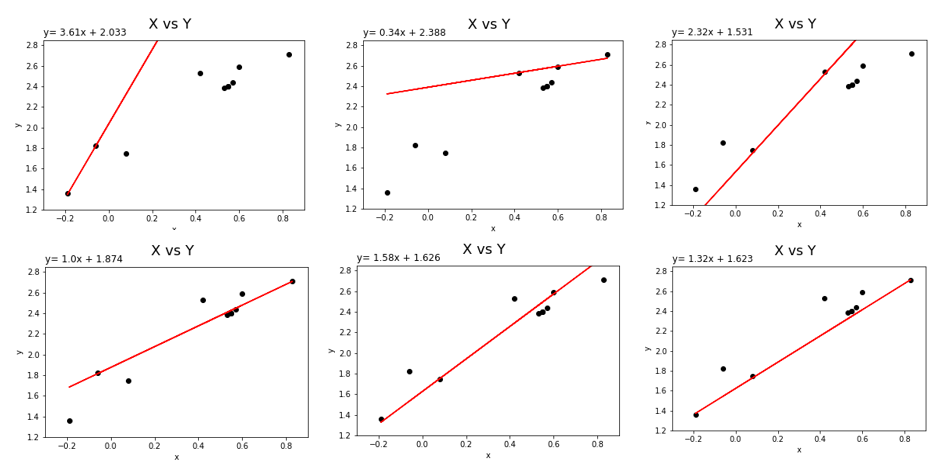

Con el fin de generar un gif animado a continuación se retoman las imágenes generadas con el código anterior, se leen y se unen para ejecutarlo como una aminación con base en la función imageio:

In [9]:
with imageio.get_writer('Al_ojo_1.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

<function matplotlib.pyplot.show>

El resultado es el siguiente archivo .gif

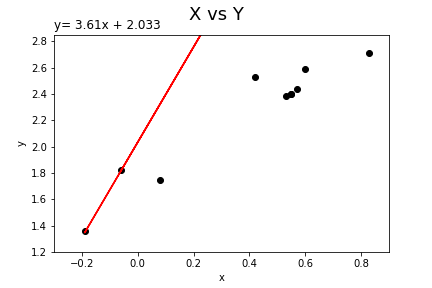

##2.2. Optimizando un modelo de regresión logística a ojo

A continuación se cargan los datos base para realizar la regresión logística al ojo

In [15]:
datos=pd.read_csv('datos_2.csv',sep=';')

Definimos los valores x y y y las constantes $β0$ y $β1$ que hacen parte de la fórmula de regresión logística univariada:

In [16]:
x=datos['x']
y=datos['y']
b_0=[-8,-6,-1,-2,-7,-8]
b_1=[5,7,5,9,11,14]
it=0

A continuación, se define la función de regresión logística univariada y se generan los puntos x y y con los cuales se graficarán las curvas. Al igual que en el anterior punto las gráficas se generan y se guardan en formato .png 

In [17]:
filenames = []
for i in range(0,6):
    for j in range(0,6):
        eq=1/(1+np.exp(-(b_0[i]+(b_1[i]*x))))
        plt.xlabel('x')
        plt.ylabel('P(Y=1|X=1)')
        plt.title('Curva logística con {} corresponde a [B_0,B_1]'.format([b_0[i],b_1[i]]),fontsize=14)
        plt.plot(x,eq, 'ro')
        filename = f'{it}.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.clf()
        it=it+1

<Figure size 432x288 with 0 Axes>

A continuación se muestran las gráficas generadas:

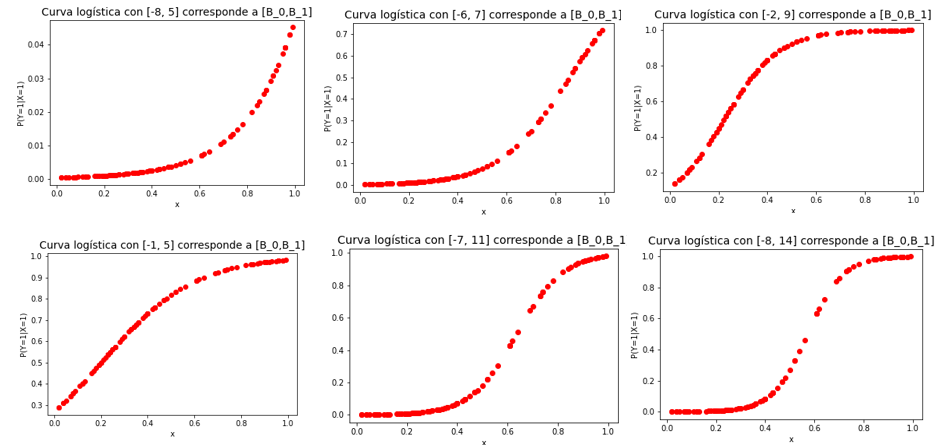

Con el fin de generar un gif animado a continuación se retoman las imágenes generadas con el código anterior, se leen y se unen para ejecutarlo como una aminación con base en la función imageio, dando como resultado las curvas logísticas:

In [18]:
with imageio.get_writer('Al_ojo_2.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

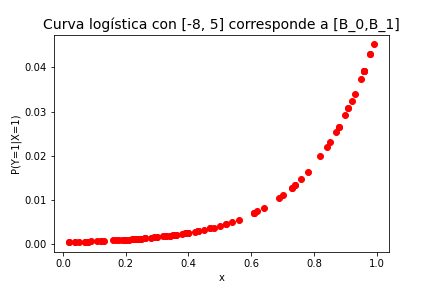

##3. Conclusiones

En nuestra opinión y sin ser los expertos en el tema a continuación, damos respuesta a los interrogantes propuestos de acuerdo con lo observado en clase y con el desarrollo de esta actividad: 

En términos generales, si bien hoy en día con la tercera y cuarta revolución todo tiende a automatizarse, podemos, en nuestra experiencia laboral comparar como hace unos años una conciliación de una cuenta bancaria era manual; rayando las n transacciones valor a valor, luego, se formuló en Excel y hoy en día en cuestión de segundos esa actividad tan repetitiva y constante la realiza un robot, sin embargo, para una empresa que solo maneja uno o dos cuentas bancarias en donde al mes solo realiza entre 20 y 30 operaciones bancarias, tal vez no se justifique en invertir en ese robot.

También se ve en el medio, que cuando fallan las aplicaciones automatizadas todo tiende a paralizarse, ¿qué pasa si se cae el sistema de la DIAN de validación de facturación electrónica?, las empresas no pueden formalizar sus ventas, para su posterior recaudo de efectivo. y si es una situación extrema, con previa autorización de la DIAN, temporalmente volver al talonario.

Hemos presenciado reuniones con empresarios muy hábiles, tiene el core del negocio en su mente, tanto que se anticipan y sobrepasan las expectativas financieras previamente presupuestadas y proyectada por los financieros, comerciales y estadísticos. y tal vez el secreto es ese, estar al frente del negocio y tener las transacciones claves en la mente

Con lo anterior y con el ejemplo sencillo que desarrollamos de la recta y la curva, podemos concluir que las actividades manuales y al ojo pueden ser viables.


3.1. ¿Es posible calibrar modelos de aprendizaje de máquina a ojo?

Puede llegar a ser complicado, pero si es viable, dependerá de la experiencia, manejo de la situación, su complejidad como cantidad de parámetros y sobre todo la exigencia en la exactitud

3.2. ¿Qué pasa con esta metodología cuando el número de parámetros aumenta?

Optimizar al ojo o con fuerza bruta se va complicando a medida que se va aumentando la cantidad de parámetros dado a esas n-dimensiones se vuelve más complicado lograr visualizar (al ojo) los diferentes resultados e identificar cual es el aproximado al mejor modelo


3.3. ¿Cómo podría disponibilizar este método de ajuste gráfico de modelos dentro de una compañía?

Este método se podría usar dentro de una compañía para encontrar tendencias a priori, en las cuales no interesan o no se cuenta con los datos precisos, sino que se busca una respuesta aproximada. Para que este método sea usado se debe contemplar su uso dentro de las políticas internas de modo que no se vea como un simple juego, adicionalmente, se debe:

1. Tener un conocimiento total de la Empresa
2. Conocer la cultura y filosofía de los dueños
3. Realizar un diagnóstico de actividades manuales y automatizadas 
4. Identificar actividades o situaciones sencillas a desarrollar con este modelo
5. Crear la política que contemple los requisitos para identificar que actividades bajo este modelo y su duración




Los archivos desarrollados en este ejercicio se encuentran en el repositorio:
https://github.com/gcarmonav/Actividad_2-Optimizar-es-divertirse

##4. Referencias


- https://imageio.readthedocs.io/en/stable/

- https://stackoverflow.com/questions/48682407/r-abline-equivalent-in-python/48683026

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

- https://programmerclick.com/article/1836884388/